In [ ]:
import pickle
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [ ]:
# You may download data by going to following link, register in the website, and login: 
# https://wti.kaust.edu.sa/solve/Arabic-Sentiment-Analysis-Challenge

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
experiment_folder = '/content/drive/My Drive/PSU_sentiment_analysis_session'
sys.path.append(experiment_folder)

In [ ]:
# !pip install farasapy

In [ ]:
# import aranorm2 as aranorm
import aranorm

In [ ]:
sample =''' 
يُشار إلى أن اللغة العربية يتحدثها أكثر من 422 مليون نسمة ويتوزع متحدثوها
 في المنطقة المعروفة باسم الوطن العربي بالإضافة إلى العديد من المناطق ال
أخرى المجاورة مثل الأهواز وتركيا وتشاد والسنغال وإريتريا وغيرها.وهي اللغ
ة الرابعة من لغات منظمة الأمم المتحدة الرسمية الست. 
'''
aranorm.normalize_arabic_text(sample)

'يشار الي ان اللغه العربيه يتحدثها اكثر من مليون نسمه ويتوزع متحدثوها في المنطقه المعروفه باسم الوطن العربي بالاضافه الي العديد من المناطق ال اخري المجاوره مثل الاهواز وتركيا وتشاد والسنغال واريتريا وغيرها وهي اللغ ه الرابعه من لغات منظمه الامم المتحده الرسميه الست'

# This Code Snippet is used to download Tweets by their IDs directly from Twitter

In [ ]:
# import tweepy
# from tqdm import tqdm
# import pandas as pd
# import pickle


# def lookup_tweets(tweet_IDs, api):
#     full_tweets = []
#     tweet_count = len(tweet_IDs)
#     try:
#         for i in tqdm(range(int(tweet_count / 100) + 1)):
#             # Catch the last group if it is less than 100 tweets
#             end_loc = min((i + 1) * 100, tweet_count)
#             full_tweets.extend(
#                 api.statuses_lookup(id_=tweet_IDs[i * 100:end_loc])
#             )
            
#     except tweepy.TweepError as e:
#         print(e)
#         print('Something went wrong, quitting...')
    
#     return full_tweets


# consumer_key = '<YOUR_CONSUMER_KEY>'
# consumer_secret = '<YOUR_CONSUMER_SECRET>'
# access_token = '<YOUR_ACCESS_TOKEN>'
# access_token_secret = '<YOUR_ACCESS_TOKEN_SECRET>'

# print('Connecting to Twitter API...')
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
# print('Connected!!')

# print('Loading Tweets IDs file...')
# filename = 'training_file_ids_n_labels_only.csv'

# data = pd.read_csv(filename)
# tweets_ids = list(data['Tweet_id'])

# print('Fetching data from API....')
# results = lookup_tweets(tweets_ids, api)

# tweets_jsons = []
# for tweet in results:
#     tweets_jsons.append(tweet._json)

# pickle.dump(tweets_jsons, open(f'{experiment_folder}/train_tweets_json.pkl', 'wb'))




In [ ]:
tweets = pickle.load(open(f'{experiment_folder}/train_tweets_json.pkl', 'rb'))

In [ ]:
len(tweets)

30622

In [ ]:
tweets[0]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Jan 27 19:48:16 +0000 2020',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1029144136887296010,
    'id_str': '1029144136887296010',
    'indices': [0, 9],
    'name': '🐆',
    'screen_name': 'Seemni71'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1221882634663604224,
 'id_str': '1221882634663604224',
 'in_reply_to_screen_name': 'Seemni71',
 'in_reply_to_status_id': 1221880527126515712,
 'in_reply_to_status_id_str': '1221880527126515712',
 'in_reply_to_user_id': 1029144136887296010,
 'in_reply_to_user_id_str': '1029144136887296010',
 'is_quote_status': False,
 'lang': 'ar',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'text': '@Seemni71 هو اساسا في ذكور دي الأيام 😭💔',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'F

In [ ]:
# create a dictionary with keys as ids and values as tweet json
tweets_by_id = {}
for tweet in tweets:
    tweets_by_id[tweet['id']] = tweet

In [ ]:
def prepare_text(x):
    tweet_id = x['Tweet_id']
    if tweet_id in tweets_by_id:
        tweet_text = tweets_by_id[tweet_id]['text']
        x['text'] = tweet_text
        x['normalized_text'] = aranorm.normalize_arabic_text(x['text'])
    return x

In [ ]:
data = pd.read_csv(f'{experiment_folder}/training_file_ids_n_labels_only.csv')
data.head()

,Tweet_id,sentiment
0,1221883443467952128,Positive
1,1221875106206638080,Positive
2,1221884257490042887,Neutral
3,1221882556548816896,Neutral
4,1227326811652026368,Positive


In [ ]:
# data = pd.read_csv(f'{experiment_folder}/training_file_ids_n_labels_only.csv')
data['text'] = 'UNKOWN_TEXT!'
data.head()

,Tweet_id,sentiment,text
0,1221883443467952128,Positive,UNKOWN_TEXT!
1,1221875106206638080,Positive,UNKOWN_TEXT!
2,1221884257490042887,Neutral,UNKOWN_TEXT!
3,1221882556548816896,Neutral,UNKOWN_TEXT!
4,1227326811652026368,Positive,UNKOWN_TEXT!


In [ ]:
# data['text'] = 'UNKOWN_TEXT!'
data = data.apply(prepare_text, axis=1)

In [ ]:
data.head()

,Tweet_id,normalized_text,sentiment,text
0,1221883443467952128,NaN,Positive,UNKOWN_TEXT!
1,1221875106206638080,والله حسب الارقام سيكون مخيب للامال ولكن الاهل...,Positive,@nas_alharbi8 والله حسب الأرقام سيكون مخيب للآ...
2,1221884257490042887,NaN,Neutral,UNKOWN_TEXT!
3,1221882556548816896,NaN,Neutral,UNKOWN_TEXT!
4,1227326811652026368,NaN,Positive,UNKOWN_TEXT!


In [ ]:
data = data[data['text'] != 'UNKOWN_TEXT!'].reset_index(drop=True) # remove tweets that have no text
data.head()

,Tweet_id,normalized_text,sentiment,text
0,1221875106206638080,والله حسب الارقام سيكون مخيب للامال ولكن الاهل...,Positive,@nas_alharbi8 والله حسب الأرقام سيكون مخيب للآ...
1,1226422627436310528,الحب الحقيقي هو اقتسام بعض نفسك مع شخص اخر اقر...,Positive,الحب الحقيقي هو اقتسام بعض نفسك مع شخص أخر أقر...
2,1221880820815798277,النهضه في فتيل,Positive,@Mo_Fat7 النهضة في فتيل 😂
3,1221884400377499651,ليس حبا في ايران بقدر ماهو نكايه بترامب وحزبه,Neutral,@halgawi @DmfMohe ليس حباً في ايران بقدر ماهو ...
4,1221881406168731649,ابي اعرف الحاكم العربي المسلم اشلون ينام مايخا...,Neutral,@adalfahadduwail أبي أعرف الحاكم العربي المسلم...


In [ ]:
data = data.drop_duplicates('normalized_text').reset_index(drop=True) # remove duplicate data
len(data)

29925

In [ ]:
len(data[data['sentiment'] == 'Positive']), \
len(data[data['sentiment'] == 'Neutral']), \
len(data[data['sentiment'] == 'Negative'])

(4607, 20808, 4510)

In [ ]:
def show_pie_chart(data_dist):
    #define Seaborn color palette to use
    red = [(0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]
    orange = [(1.0, 0.4980392156862745, 0.0)]
    green = [(0.2, 0.6274509803921569, 0.17254901960784313)]
    labels = ['Positive', 'Neutral', 'Negative']
    #create pie chart
    plt.pie(data_dist, labels = labels, colors=green+orange+red, autopct='%.0f%%')
    plt.show()

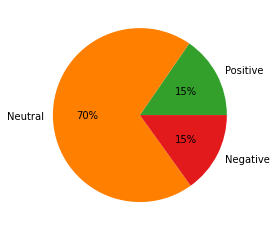

In [ ]:
data_dist = [
                len(data[data['sentiment'] == 'Positive']),
                len(data[data['sentiment'] == 'Neutral']),
                len(data[data['sentiment'] == 'Negative'])
            ]
show_pie_chart(data_dist)

In [ ]:
data.to_csv(f'{experiment_folder}/unbalanced_data_psu.csv', index=False)

One way to balance the number of examples in all classes is to find the class that has the minimum number of examples then randomly sample the same amount of examples from all other classes.

In [ ]:
# find the minimum number of examples from all classes
min_class = min(
                len(data[data['sentiment'] == 'Positive']),
                len(data[data['sentiment'] == 'Neutral']),
                len(data[data['sentiment'] == 'Negative'])
               )
min_class

4510

In [ ]:
data.head()


,Tweet_id,normalized_text,sentiment,text
0,1221875106206638080,والله حسب الارقام سيكون مخيب للامال ولكن الاهل...,Positive,@nas_alharbi8 والله حسب الأرقام سيكون مخيب للآ...
1,1226422627436310528,الحب الحقيقي هو اقتسام بعض نفسك مع شخص اخر اقر...,Positive,الحب الحقيقي هو اقتسام بعض نفسك مع شخص أخر أقر...
2,1221880820815798277,النهضه في فتيل,Positive,@Mo_Fat7 النهضة في فتيل 😂
3,1221884400377499651,ليس حبا في ايران بقدر ماهو نكايه بترامب وحزبه,Neutral,@halgawi @DmfMohe ليس حباً في ايران بقدر ماهو ...
4,1221881406168731649,ابي اعرف الحاكم العربي المسلم اشلون ينام مايخا...,Neutral,@adalfahadduwail أبي أعرف الحاكم العربي المسلم...


In [ ]:
# randomly sample data with the "min_class" amount 
sampled_positive = data[data['sentiment'] == 'Positive'].sample(n=min_class)
sampled_neutral = data[data['sentiment'] == 'Neutral'].sample(n=min_class)
sampled_negative = data[data['sentiment'] == 'Negative'].sample(n=min_class)

In [ ]:
sampled_positive = sampled_positive.reset_index(drop=True)
sampled_neutral = sampled_neutral.reset_index(drop=True)
sampled_negative = sampled_negative.reset_index(drop=True)

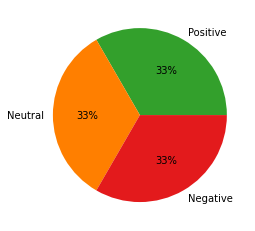

In [ ]:
data_dist = [
                len(sampled_positive),
                len(sampled_neutral),
                len(sampled_negative)
            ]
show_pie_chart(data_dist)

Finally, combine all classes together, shuffle them, and reset index for the whole data

In [ ]:
balanced_data = sampled_positive.append(sampled_neutral).append(sampled_negative).sample(frac=1).reset_index(drop=True)
balanced_data

,Tweet_id,normalized_text,sentiment,text
0,1221776528259854336,و للمره المليون الاب والله اولا و عاشرا و اخيرا,Positive,و للمرة المليون الأب والله أولاً و عاشراً و أخ...
1,1217682671469461504,يا وحشه غيابك ويا شين فرقاه ويا كبر ذنبه لو هق...,Neutral,يا وحشة غيابك ويا شين فرقاه\nويا كبر ذنبه لو ه...
2,1146251606167556099,خيبكم الله حولتم بلاد التوحيد الي مزارات للدعا...,Negative,خيبكم الله ، حولتم بلاد التوحيد إلى مزارات للد...
3,1243483945917956097,من امس ارسل علي الخاص و اتصل علي لا يوجد اي تج...,Negative,@stccare_ksa @stc_ksa @stc من أمس ارسل على الخ...
4,1080541514470703105,اعوذ بالله من زوجه ما تبغي الطايف في شهر العسل,Neutral,أعوذ بالله من زوجة ما تبغى الطايف في شهر العسل
...,...,...,...,...
13525,1221076189386813448,والله عرض باقه جوي تي في حقت جدا مغريه رسيفرهم...,Neutral,والله عرض باقة جوي تي في حقت stc جداً مغرية.. ...
13526,1147191534607065089,مءسف مشروع سكك السلام سيمر عبر مدينه نيوم يا ب...,Negative,"#مؤسف\nمشروع""#سكك_السلام"" سيمر عبر مدينة #نيوم..."
13527,1183106027509686272,العرب منغمسين في المءامرات والادانه هولاء احفا...,Neutral,العرب منغمسين في المؤامرات والادانة هولاء أحفا...
13528,1254848763950137344,حرام تاخذون فلوس الطلب و تتجاهلون العميل اين طلب,Negative,@ASQ_Group @asq_groupCS @MCgovSA حرام تاخذون ف...


In [ ]:
balanced_data = balanced_data[~balanced_data['normalized_text'].isna()].reset_index(drop=True)
len(balanced_data)

13530

In [ ]:
balanced_data.to_csv(f'{experiment_folder}/balanced_data_psu.csv', index=False)